## Семинар 11
# Тема:  Работа с выбросами

Выбросы – это точки данных в признаке, которые отклоняются от нормы значений этого признака.

Нет однозначного способа понять, что перед нами выброс. Разные способы обнаружения выбросов возвращают разные точки в качестве выбросов, и эти точки пересекаются лишь частично.


**Способы обнаружения выбросов:**

1. Поиск по порогу. 

Этот способ представляет собой погружение в предметную область и понимание того, какие значения признаки могут принимать, а какие - не могут.

2. Обнаружение и обработка выбросов, используя метод **IQR** (interquartile range, межквартильное расстояние).

Строим `boxplot` и все значения вне "усов" считаем выбросами. Левая линия ящика обозначает первый квартиль (25-й перцентиль q25), а правая линия ящика обозначает третий квартиль (75-й перцентиль q75). Границы "усов" определяются так: 

нижняя граница - это минимальное значение признака между q25 - (1.5*iqr) и q75 + (1.5*iqr),

верхняя граница  - это максимальное значение признака между q25 - (1.5*iqr) и q75 + (1.5*iqr), 

где  iqr = q75-q25

Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами "усов".
   
3.  Поиск по отклонению (z-score)
  
Поиск по отклонению основан на поиске значения, на которое отклоняется данная точка от среднего. Делается это с помощью z-score, то есть, расстояния (измеряемого в количестве стандартных отклонений) от среднего значения точек.  

4. Поиск выбросов с помощью методов машинного обучения

Например, изолирующий лес (Isolation Forest) 

**Способы борьбы с выбросами:**

- Выкинуть эти данные (только на трейне, на тесте ничего не выкидываем).
- Заменять выбросы разными методами (использовать знания по предметной области, медианы, средние значения, np.clip и т.д.) 
- Делать/не делать дополнительную фичу. 
- Ничего не делать

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.ensemble import IsolationForest

### 1. Загрузите датасет apartament.csv и выведите первые 5 строк. 

In [2]:
df = pd.read_csv("apartment.csv")
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


### 2. Создайте копию загруженного датафрейма и выведите информацию о данных.

In [3]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### 3. Осуществите обнаружение выбросов **по порогу** для признака `Rooms`. Для этого используйте следующие знания по предметной области: количество комнат не может быть 0 и больше 6. Выведите индексы тех наблюдений, где количество комнат не удовлетворяет этим условиям. Подсчитайте их количество.

In [4]:
rooms = df1[(df1['Rooms'] < 1) | (df1['Rooms'] > 6)]
rooms

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863
3780,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7929,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
9767,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389


In [5]:
rooms.index

Index([2004, 2194, 2728, 3780, 5894, 6088, 6401, 7644, 7929, 9767, 9869], dtype='int64')

### 4. Обработайте выбросы в пизнаке Rooms, например, так: если число комнат равно нулю, то замените его на 1, если больше 6 - на 6. Добавьте к исходному датасету признак Rooms_outlier, в котором на местах с выбросами стоят 1, а остальные - 0. 

In [6]:
df1['Rooms'] = np.where(df1['Rooms'] < 1, 1, df1['Rooms'])
df1['Rooms'] = np.where(df1['Rooms'] > 6, 6, df1['Rooms'])

In [7]:
df1['Rooms_outlier'] = np.where((df1['Rooms'] < 1) | (df1['Rooms'] > 6), 1, 0)

### 5. Для признака Ecology_1 осуществите обнаружение выбросов методом **IQR**. Для этого постройте "ящик с усами" для этого признака и визуально определите наличие выбросов. 

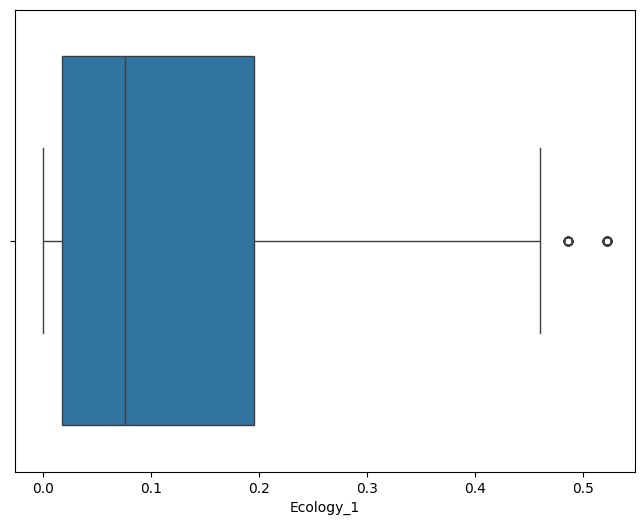

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Ecology_1'])

plt.xlabel('Ecology_1')
plt.show()

### 6. Используя функцию outliers_iqr определите индексы наблюдений с выбросами. Подсчитайте их количество.

In [9]:
def outliers_iqr(x):
    q25 = x.quantile(.25)
    q75 = x.quantile(.75)  
    iqr = q75 - q25   
    lower_bound = q25 - iqr * 1.5  
    upper_bound = q75 + iqr * 1.5 
    outliers_index = x[(x > upper_bound) | (x < lower_bound)].index
    min_border = x[(x <= upper_bound) & (x >= lower_bound)].min()
    max_border = x[(x <= upper_bound) & (x >= lower_bound)].max()
    return outliers_index, min_border, max_border

In [10]:
outlier_indices, min_border, max_border = outliers_iqr(df1['Ecology_1'])

In [11]:
outlier_indices

Index([ 201,  516,  704,  719,  798,  802, 1041, 1051, 1351, 1386, 1772, 2073,
       2080, 2135, 2226, 2446, 2495, 2536, 3049, 3305, 3511, 4063, 4089, 4265,
       4373, 4519, 4561, 4719, 4985, 5082, 5200, 5244, 5311, 5401, 5420, 5439,
       5777, 5807, 5903, 6140, 6199, 6231, 6426, 7375, 7450, 7609, 7836, 8223,
       8240, 8308, 8362, 8435, 8587, 8629, 9188, 9347, 9368, 9371, 9627, 9958,
       9985],
      dtype='int64')

In [12]:
len(outlier_indices)

61

In [13]:
min_border, max_border

(np.float64(0.0), np.float64(0.460556389))

### 7. Обработайте выбросы в пизнаке Ecology_1, например, так: замените их на np.nan и далее удалите наблюдения с пропусками в пизнаке Ecology_1.

In [14]:
df1.shape

(10000, 21)

In [15]:
df1.loc[outlier_indices, 'Ecology_1'] = np.nan


df1 = df1.dropna(subset=['Ecology_1'])

In [16]:
df1.shape

(9939, 21)

### 8. Снова постройте "ящик с усами" для этого признака и убедитесь, что выбросов больше нет.

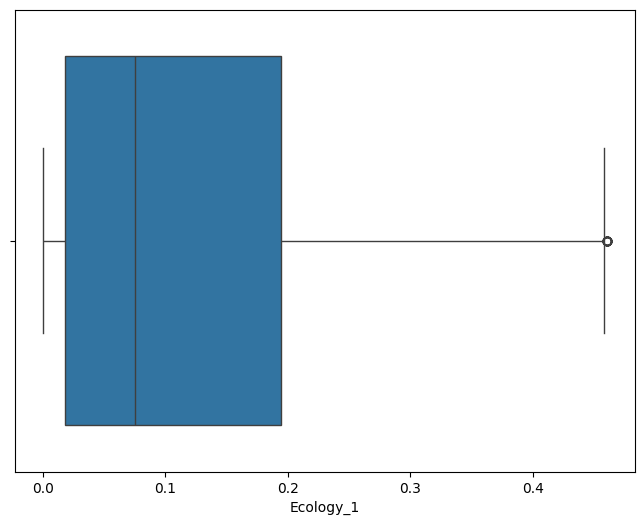

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Ecology_1'])

plt.xlabel('Ecology_1')
plt.show()

### 9. Для признака Square осуществите обнаружение выбросов методом **z-score**. Для этого используйте функцию outliers_z_score и определите индексы наблюдений с выбросами. Подсчитайте их количество.

In [18]:
def outliers_z_score(x, threshold=3):
    mean = np.mean(x)
    std = np.std(x)
    z_scores = [(element - mean) / std for element in x]
    print(len(z_scores))
    return np.where(np.abs(z_scores) > threshold)[0]

In [19]:
outlier_indices = outliers_z_score(df1['Square'])
outlier_indices

9939


array([ 136,  285,  348,  402,  442,  510,  597,  690,  722,  726,  860,
       1078, 1164, 1343, 1439, 1449, 1596, 1604, 1682, 1719, 1765, 1840,
       1895, 1938, 1969, 2026, 2030, 2055, 2073, 2252, 2310, 2321, 2378,
       2388, 2414, 2499, 2645, 2772, 2945, 2992, 3102, 3163, 3185, 3934,
       4419, 4586, 4649, 4967, 5002, 5226, 5227, 5251, 5375, 5440, 5550,
       5595, 5728, 5806, 5953, 5991, 6060, 6168, 6301, 6407, 6457, 6506,
       6575, 6786, 6866, 6963, 6967, 7101, 7130, 7353, 7598, 7664, 7832,
       7964, 7997, 8008, 8081, 8414, 8623, 8818, 8983, 9050, 9174, 9252,
       9475, 9604, 9708, 9787, 9818])

In [20]:
len(outlier_indices)

93

### 10.  Обработайте выбросы в пизнаке Square заменив их медианным значением. Добавьте к исходному датасету признак Square_outlier, в котором на местах с выбросами стоят 1, а остальные - 0. 

In [21]:
df1['Square_outlier'] = 0
df1['Square_outlier'].iloc[outlier_indices] = 1

/tmp/ipykernel_12618/2253761116.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['Square_outlier'].iloc[outlier_indices] = 1
/tmp/ipykernel_12618/2253761116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [22]:
median_square = df1['Square'].median()


df1['Square'] = np.where(df1.index.isin(outlier_indices), median_square, df1['Square'])

In [25]:
df1.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,11,3097,0,NaN,0,0,B,305018.871089,0,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,B,177734.553407,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,B,282078.720850,0,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,1,264,0,NaN,0,1,B,168106.007630,0,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,NaN,0,6,B,343995.102962,0,0


In [29]:
df1['Square_outlier'].value_counts()

Square_outlier
0    9846
1      93
Name: count, dtype: int64

# Задания для самостоятельного выполнения
Продолжите работу с рассматриваемым датасетом `apartment.csv`. 
1. Осуществите обнаружение выбросов **по порогу** для признака `KitchenSquare`. Для этого используйте следующие знания по предметной области: площадь кухни не может быть меньше 3 и больше 13 метров. Выведите индексы тех наблюдений, где это условие не выполняется. Подсчитайте их количество.
2. Обработайте выбросы в пизнаке `KitchenSquare`, например, так: площадь кухни меньше 3, то замените его на 3, если больше 13 - на медианное значение. Добавьте к исходному датасету признак `KitchenSquare_outlier`, в котором на местах с выбросами стоят 1, а остальные - 0. 
3. Осуществите обнаружение выбросов **по порогу** для признака `Floor`. Для этого используйте следующие знания по предметной области: этаж квартиры `Floor` не должен быть больше этажности дома `HouseFloor`. Выведите индексы тех наблюдений, где это условие не выполняется. Подсчитайте их количество.
4. Обработайте выбросы в пизнаке `Floor`, например, так: замените этаж квартиры `Floor` на случайный от 0 (подвал) до числа этажей в доме `HouseFloor`. Добавьте к исходному датасету признак `Floor_outlier`, в котором на местах с выбросами стоят 1, а остальные - 0. 
5. Для признака `Social_1` осуществите обнаружение выбросов методом **IQR**. Для этого постройте "ящик с усами" для этого признака и визуально убедитесь, что выбросов нет. 
6. Для признака `Social_2` осуществите обнаружение выбросов методом **IQR**. Для этого постройте "ящик с усами" для этого признака и визуально определите наличие выбросов. Используя функцию `outliers_iqr` определите индексы наблюдений с выбросами. Подсчитайте их количество.
7. Обработайте выбросы в пизнаке `Social_2`, например, так: замените их на np.nan и далее удалите наблюдения с пропусками.
8. Для признака `Social_3` осуществите обнаружение выбросов методом **z-score**. Для этого используйте функцию `outliers_z_score` и определите индексы наблюдений с выбросами. Подсчитайте их количество.
9.  Обработайте выбросы в пизнаке `Social_3` заменив их медианным значением. Добавьте к исходному датасету признак `Social_3_outlier`, в котором на местах с выбросами стоят 1, а остальные - 0.
10. Осуществите обнаружение выбросов для признака `HouseYear` используя модель IsolationForest(contamination = 0.1, random_state = 42).